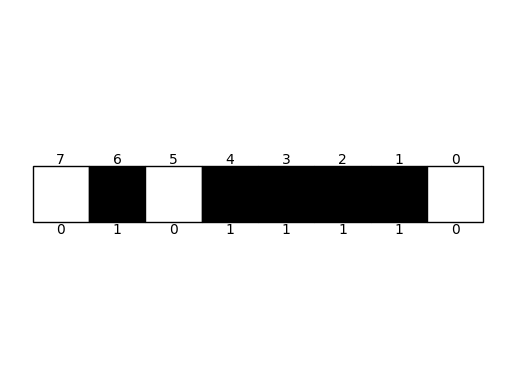

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def draw_binary(bs):
    fig, ax = plt.subplots()

    for i, b in enumerate(bs):
        color = 'w' if b == '0' else 'k'
        square = plt.Rectangle((i, 0), 1, 1, fill=True, facecolor=color, edgecolor='k')
        ax.add_patch(square)
        ax.text(i+0.5, 0, b, horizontalalignment='center', verticalalignment='top', color='k')
        ax.text(len(bs) - i-0.5, 1,str(i) , horizontalalignment='center', verticalalignment='bottom', color='k')

    plt.axis('equal')
    plt.axis('off')
    plt.show()


def binary(num, width=8):
    return np.binary_repr(num, width=width)

draw_binary('01011110')

## 数据类型

### 整型数据 `int`, `np.int32`, `np.int64`

In [ ]:
a = 7

In [ ]:
binary(a)

In [ ]:
draw_binary(binary(a))

In [ ]:
for i in range(5):
    draw_binary(binary(1<<i))

In [ ]:
draw_binary(binary(a, 16))

In [ ]:
(1<<7)-1

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZZe461O6VuJqOWZs_jkv0iLVxh-MukMChAg&s)


In [ ]:
draw_binary(binary(-a))

In [ ]:
# 首位表示负数
draw_binary(binary((1<<7)-1))


In [ ]:
(1<<31)-1

In [ ]:
1<<63-1

In [ ]:
np.array([(1<<63)-1], dtype=np.int64)

In [ ]:
1<<512

### 浮点型数据 `float`, `np.float32`, `np.float64`
- `float` → `np.float64` 双精度浮点数据，对应 Java/C 的 `double`

In [ ]:
a = np.array([3.14], dtype=float)
a.dtype

![](../../imgs/float.jpeg)

In [ ]:
num = 3.14
x = np.float32(num)
binary_32 = np.binary_repr(x.view(np.uint32), width=32)
print("float32二进制表示:", binary_32)

y = np.float64(num)
binary_64 = np.binary_repr(y.view(np.uint64), width=64)
print("float64二进制表示:", binary_64)

In [ ]:
num = 3.140000000000001
x = np.float32(num)
binary_32 = np.binary_repr(x.view(np.uint32), width=32)
print("float32二进制表示:", binary_32)

y = np.float64(num)
binary_64 = np.binary_repr(y.view(np.uint64), width=64)
print("float64二进制表示:", binary_64)

In [ ]:
def view_32(x):
    x = np.float32(x)
    return np.binary_repr(x.view(np.uint32), width=32)

def view_64(x):
    x = np.float64(x)
    return np.binary_repr(x.view(np.uint64), width=64)

In [ ]:
eps = 0.0001
num = 3.14
for i in range(10):
    if view_32(num) == view_32(num+eps):
        print(f"float32: {eps:.20f}")
    eps /= 10

for i in range(10):
    if view_64(num) == view_64(num+eps):
        print(f"float64: {eps:.20f}")
    eps /= 10


## 算法复杂度
### 时间复杂度 Time Complexity
- O(1) 常数时间
- O(log n) 对数时间
- O(n) 线性时间
- O(n log n) 线性对数时间
- O(n^2) 平方时间
- O(n^3) 立方时间
- O(2^n) 指数时间 - 摩尔定律 Moore's Law - 硅片上的原子数目，每 18 个月翻一倍
- O(n!) 阶乘时间 - NP hard

In [ ]:
import math
max_x =8
x = np.linspace(0.01, max_x, 100) # 0.01 to 10, 100 points
x_int = np.arange(1, max_x+1)

plt.plot(x, np.log(x), label='O(log n)')
plt.plot(x, x, label='O(n)')
plt.plot(x, x * np.log(x), label='O(n log n)') # ************
plt.plot(x, x**2, label='O(n^2)')
plt.plot(x, x**3, label='O(n^3)')
plt.plot(x, 2**x, label='O(2^n)')
plt.plot(x_int, [math.factorial(x) for x in x_int], label='O(n!)') # NP hard
plt.legend()
plt.show()

In [ ]:
import time

In [ ]:
n = 100000

In [ ]:
# algorithm of O(1) - Gauss sum
tot = (1+n)*n//2
tot

In [ ]:
# algorithm of O(n)
cur = time.time()
tot = 0
for i in range(n+1):
    tot += i
duration = time.time() - cur
tot

In [ ]:
duration

In [ ]:
# algorithm of O(n^2)
tot = 0
for i in range(n+1):
    for j in range(n+1):
        if i == j:
            tot += i
tot

In [ ]:
duration*n/60/60 # hours for O(n^2)

In [ ]:
duration*n*n/60/60/24/365 # years for O(n^3)

In [ ]:
2**27

## 二分搜索 Binary Search

在单调的情形下，可以使用二分搜索来查找某个值的位置。


In [ ]:
l, r = 0, 10000000

def check(num):
    return num < 1000

while l < r:
    m = (l + r) // 2
    print(m, l, r)
    if check(m):
        l = m + 1
    else:
        r = m

使用二分搜索切分多边形

In [1]:
from shapely import Polygon, LineString, GeometryCollection
from shapely.ops import split
eps = 0.0001

def random_polygon(n, min_r, max_r):
    angle_step = 2 * np.pi / n
    pts = []
    for i in range(n):
        r = np.random.uniform(min_r, max_r)
        angle = i * angle_step
        x, y = r * np.cos(angle), r * np.sin(angle)
        pts.append([x, y])
    return pts

def split_polygon(ply, x):
    bottom, top = ply.bounds[1]-eps, ply.bounds[3]+eps
    ls = LineString([(x, bottom), (x, top)])
    left, right = split(ply, ls).geoms
    return left, right



In [11]:
# check if x need to move larger
def check(ply, x):
    if x > ply.bounds[2]:
        return True
    if x < ply.bounds[0]:
        return False
    left, right = split_polygon(ply, x)
    if left.area > right.area:
        return True


Optimization done within 19 steps
329.0284969653287 329.03005574363635
CPU times: user 11.4 ms, sys: 4.73 ms, total: 16.1 ms
Wall time: 17.3 ms


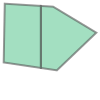

In [12]:
%%time
ply = Polygon(random_polygon(5, 10, 20))
l, r = ply.bounds[0], ply.bounds[2]
cnt = 0
while l + eps < r:

    m = (l + r) / 2
    cnt += 1
    if check(ply, m):
        l = m
    else:
        r = m

print(f'Optimization done within {cnt} steps')
left, right = split_polygon(ply, r)
print(left.area, right.area)
GeometryCollection([left, right])

## 时间复杂度与编程语言
高级编程语言中，C++是执行速度最快的语言。一般来说，Python 比 C++ 慢 10 倍以上，Java 比 C++ 慢大约 2-3 倍。
![](https://niklas-heer.github.io/speed-comparison/assets/latest/combined_results.png)
https://niklas-heer.github.io/speed-comparison/

In [ ]:
arr = [i for i in range(10000000)]
arr_np = np.array(arr)

In [ ]:
%%time
[x+1 for x in arr];

In [ ]:
%%time
arr_np+=1